### 원하는이미지를 리스트에 담아 한장씩 테스트 결과 뽑기


0: 640x640 1 11013007, 1 01012006, 1 10012001, 1 12011003, 1 03011011, 1 08012001, 28.0ms
Speed: 3.0ms preprocess, 28.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
모델 'large_blur_epoch200'의 결과를 'C:/Users/Sesame/Desktop/total_test_frame/visualization_results\large_blur_epoch200_frame171.jpg'에 저장했습니다.


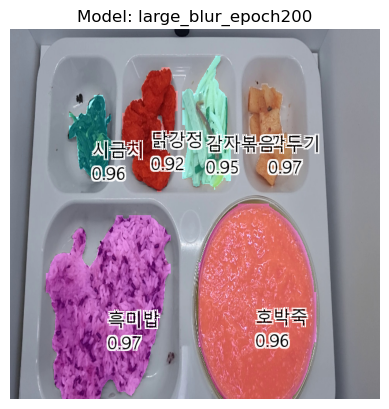


0: 640x640 1 11013007, 1 01012006, 1 10012001, 1 12011003, 1 03011011, 1 08012001, 25.0ms
Speed: 2.0ms preprocess, 25.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
모델 'large_epoch200'의 결과를 'C:/Users/Sesame/Desktop/total_test_frame/visualization_results\large_epoch200_frame171.jpg'에 저장했습니다.


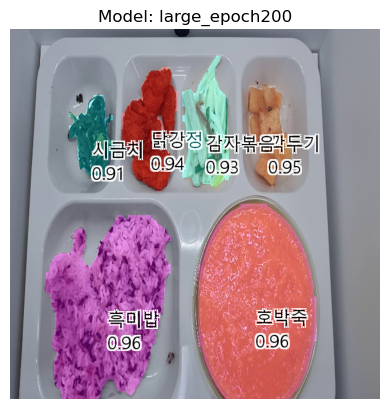


0: 640x640 1 01012006, 1 10012001, 1 12011003, 1 03011011, 39.0ms
Speed: 3.0ms preprocess, 39.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
모델 'large_epoch400'의 결과를 'C:/Users/Sesame/Desktop/total_test_frame/visualization_results\large_epoch400_frame171.jpg'에 저장했습니다.


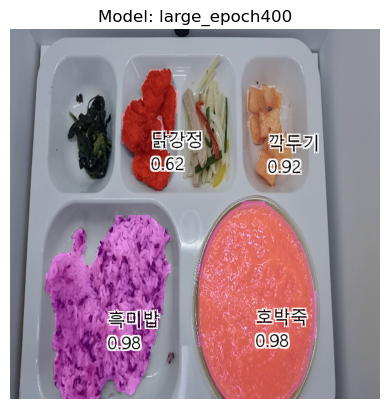


0: 640x640 1 12011003, 1 03011011, 35.0ms
Speed: 2.0ms preprocess, 35.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
모델 'total_100org_50scale_large_best'의 결과를 'C:/Users/Sesame/Desktop/total_test_frame/visualization_results\total_100org_50scale_large_best_frame171.jpg'에 저장했습니다.


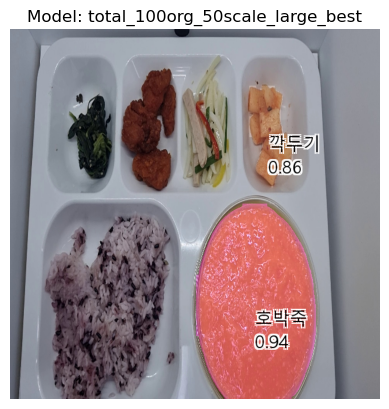


0: 640x640 1 06012004, 1 01012006, 1 12011003, 1 03011011, 29.0ms
Speed: 3.0ms preprocess, 29.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
모델 'total_50org_100scale_10000mix_200_32_a100_best'의 결과를 'C:/Users/Sesame/Desktop/total_test_frame/visualization_results\total_50org_100scale_10000mix_200_32_a100_best_frame171.jpg'에 저장했습니다.


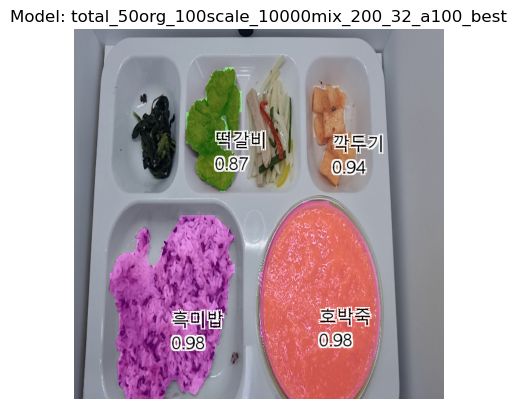

In [4]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np
from PIL import Image, ImageDraw, ImageFont


# 한글 지원 함수
def put_text_korean(image, text, position, font_path, font_size, color, outline_color=None, outline_width=3):
    """
    OpenCV 이미지를 사용하여 한글 텍스트를 표시하며, 테두리 지원 옵션 추가.
    Args:
        image: OpenCV 이미지 (numpy array)
        text: 표시할 한글 텍스트
        position: 텍스트 위치 (x, y)
        font_path: 한글 폰트 파일 경로
        font_size: 텍스트 크기
        color: 텍스트 색상 (B, G, R)
        outline_color: 테두리 색상 (B, G, R), None이면 테두리 없음
        outline_width: 테두리 두께
    Returns:
        한글 텍스트가 추가된 OpenCV 이미지
    """
    # OpenCV 이미지를 Pillow 이미지로 변환
    img_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(img_pil)

    # 폰트 설정
    font = ImageFont.truetype(font_path, font_size)

    # 테두리 텍스트 추가
    if outline_color is not None:
        x, y = position
        for dx, dy in [(-outline_width, 0), (outline_width, 0), (0, -outline_width), (0, outline_width),
                       (-outline_width, -outline_width), (-outline_width, outline_width),
                       (outline_width, -outline_width), (outline_width, outline_width)]:
            draw.text((x + dx, y + dy), text, font=font, fill=outline_color)

    # 본문 텍스트 추가
    draw.text(position, text, font=font, fill=color)

    # Pillow 이미지를 다시 OpenCV 이미지로 변환
    return cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)


# 한글 폰트 경로 설정 (Windows의 경우 기본 폰트 경로 사용)
font_path = "C:/Windows/Fonts/malgun.ttf"  # 맑은 고딕


# 1. 모델 및 이미지 경로 설정
model_folder = 'C:/Users/Sesame/Desktop/total_best_pt_last/vs'  # 모델들이 있는 폴더 경로
image_folder = 'C:/Users/Sesame/Desktop/total_test_frame'  # 테스트할 이미지들이 저장된 폴더 경로
output_folder = 'C:/Users/Sesame/Desktop/total_test_frame/visualization_results'  # 테스트 결과이미지를 저장할 폴더

# 결과 저장 폴더가 없으면 생성
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 테스트할 이미지 파일 리스트 설정
# test_image_files = ["frame115.jpg", "frame516.jpg", "frame107.jpg","frame354.jpg" ]  # 테스트할 이미지 파일명 리스트
test_image_files = ["frame171.jpg"]
# 모델별 결과 시각화
model_files = [f for f in os.listdir(model_folder) if f.lower().endswith('.pt')]

for model_file in model_files:  # 모델 파일 순회
    model_path = os.path.join(model_folder, model_file)
    model = YOLO(model_path)  # YOLO 모델 로드
    model_name = os.path.splitext(model_file)[0]  # 모델 파일명에서 확장자 제거

    for test_image_file in test_image_files:  # 이미지 파일 리스트 순회
        image_path = os.path.join(image_folder, test_image_file)

        # 이미지 읽기 및 리사이즈
        image = cv2.imread(image_path)
        resized_image = cv2.resize(image, (640, 640))  # 이미지 리사이즈
        overlay_image = resized_image.copy()  # 원본 이미지 복사 (초기화)

        results = model(resized_image)  # YOLO 예측 수행
        cls_name_color = {
            '01011001': ('쌀밥', (255, 0, 255), 0),
            '04017001': ('된찌', (0, 255, 255), 1),
            '06012004': ('떡갈비', (0, 255, 0), 2),
            '07014001': ('계란말이', (0, 0, 255), 3),
            '11013007': ('시금치', (255, 255, 0), 4),
            '12011008': ('김치', (100, 100, 100), 5),
            '01012006': ('흑미밥', (255, 0, 255), 6),
            '04011005': ('미역국', (0, 255, 255), 7),
            '04011007': ('쇠고기국', (0, 255, 255), 8),
            '06012008': ('불고기', (0, 255, 0), 9),
            '08011003': ('멸치볶음', (0, 0, 255), 10),
            '10012001': ('닭강정', (0, 0, 255), 11),
            '11013002': ('고사리', (255, 255, 0), 12),
            '12011003': ('깍두기', (100, 100, 100), 13),
            '01012002': ('콩밥', (255, 0, 255), 14),
            '04011011': ('어묵국', (0, 255, 255), 15),
            '07013003': ('김치전', (0, 0, 255), 16),
            '11013010': ('콩나물', (255, 255, 0), 17),
            '03011011': ('호박죽', (255, 0, 255), 18),
            '08012001': ('감자볶음', (255, 255, 0), 19)
        }
        # 결과 처리
        if not results[0].masks:  # 탐지되는 객체가 없을 경우
            print(f"{test_image_file} - 탐지되는 객체 없음")
            overlay_image = put_text_korean(
                overlay_image,
                "No objects detected",
                (20, 50),
                font_path,
                font_size=30,
                color=(0, 0, 255),
                outline_color=(255, 255, 255),
                outline_width=3
            )
        else:
            masks = results[0].masks.data.cpu().numpy()
            boxes = results[0].boxes
            id_to_name_color = {v[2]: (v[0], v[1]) for v in cls_name_color.values()}  # ID를 키로 매핑 생성

            # Segmentation 마스크 및 텍스트 처리
            for i, mask in enumerate(masks):
                class_id = int(boxes.cls[i].item())
                confidence = boxes.conf[i].item()

                # 색상 범위 검사
                color = id_to_name_color.get(class_id, ('Unknown', (255, 255, 255)))[1]
                class_name = id_to_name_color.get(class_id, ('Unknown', (255, 255, 255)))[0]

                # 반투명 마스크 적용
                mask_color = np.zeros_like(resized_image, dtype=np.uint8)
                mask_color[mask > 0.5] = color
                overlay_image = cv2.addWeighted(overlay_image, 1.0, mask_color, 0.3, 0)

                # 마스크 중심 좌표 계산
                y_coords, x_coords = np.where(mask > 0.5)
                if len(x_coords) > 0 and len(y_coords) > 0:
                    x_center, y_center = int(np.mean(x_coords)), int(np.mean(y_coords))

                    # 한글 텍스트 추가
                    class_text = f"{class_name}"  # 한글명으로 표시
                    confidence_text = f"{confidence:.2f}"
                    overlay_image = put_text_korean(
                        overlay_image,
                        class_text,
                        (x_center, y_center),
                        font_path,
                        font_size=30,
                        color=(0, 0, 0),
                        outline_color=(255, 255, 255),
                        outline_width=3
                    )
                    overlay_image = put_text_korean(
                        overlay_image,
                        confidence_text,
                        (x_center, y_center + 40),
                        font_path,
                        font_size=30,
                        color=(0, 0, 0),
                        outline_color=(255, 255, 255),
                        outline_width=3
                    )

        # 결과 저장
        save_filename = f"{model_name}_{test_image_file}"
        save_path = os.path.join(output_folder, save_filename)
        cv2.imwrite(save_path, overlay_image)  # 결과 이미지 저장
        print(f"모델 '{model_name}'의 결과를 '{save_path}'에 저장했습니다.")

        # 시각화 표시 (옵션)
        plt.imshow(cv2.cvtColor(overlay_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Model: {model_name}")
        plt.axis("off")
        plt.show()

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np
from PIL import Image, ImageDraw, ImageFont


# 한글 지원 함수
def put_text_korean(image, text, position, font_path, font_size, color, outline_color=None, outline_width=3):
    """
    OpenCV 이미지를 사용하여 한글 텍스트를 표시하며, 테두리 지원 옵션 추가.
    Args:
        image: OpenCV 이미지 (numpy array)
        text: 표시할 한글 텍스트
        position: 텍스트 위치 (x, y)
        font_path: 한글 폰트 파일 경로
        font_size: 텍스트 크기
        color: 텍스트 색상 (B, G, R)
        outline_color: 테두리 색상 (B, G, R), None이면 테두리 없음
        outline_width: 테두리 두께
    Returns:
        한글 텍스트가 추가된 OpenCV 이미지
    """
    # OpenCV 이미지를 Pillow 이미지로 변환
    img_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(img_pil)

    # 폰트 설정
    font = ImageFont.truetype(font_path, font_size)

    # 테두리 텍스트 추가
    if outline_color is not None:
        x, y = position
        for dx, dy in [(-outline_width, 0), (outline_width, 0), (0, -outline_width), (0, outline_width),
                       (-outline_width, -outline_width), (-outline_width, outline_width),
                       (outline_width, -outline_width), (outline_width, outline_width)]:
            draw.text((x + dx, y + dy), text, font=font, fill=outline_color)

    # 본문 텍스트 추가
    draw.text(position, text, font=font, fill=color)

    # Pillow 이미지를 다시 OpenCV 이미지로 변환
    return cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)


# 한글 폰트 경로 설정 (Windows의 경우 기본 폰트 경로 사용)
font_path = "C:/Windows/Fonts/malgun.ttf"  # 맑은 고딕


# 1. 모델 및 이미지 경로 설정
model_folder = 'C:/Users/Sesame/Desktop/1st_best_pt'  # 모델들이 있는 폴더 경로
image_folder = 'C:/Users/Sesame/Desktop/saved_frames_for_test'  # 테스트할 이미지들이 저장된 폴더 경로
output_folder = 'C:/Users/Sesame/Desktop/1st_test_result_oneimage'  # 테스트 결과이미지를 저장할 폴더

# 결과 저장 폴더가 없으면 생성
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 테스트할 이미지 파일 리스트 설정
# test_image_files = ["frame115.jpg", "frame516.jpg", "frame107.jpg","frame354.jpg" ]  # 테스트할 이미지 파일명 리스트
test_image_files = ["frame_20241217-133818.jpg"]
# 모델별 결과 시각화
model_files = [f for f in os.listdir(model_folder) if f.lower().endswith('.pt')]

for model_file in model_files:  # 모델 파일 순회
    model_path = os.path.join(model_folder, model_file)
    model = YOLO(model_path)  # YOLO 모델 로드
    model_name = os.path.splitext(model_file)[0]  # 모델 파일명에서 확장자 제거

    for test_image_file in test_image_files:  # 이미지 파일 리스트 순회
        image_path = os.path.join(image_folder, test_image_file)

        # 이미지 읽기 및 리사이즈
        image = cv2.imread(image_path)
        resized_image = cv2.resize(image, (640, 640))  # 이미지 리사이즈
        overlay_image = resized_image.copy()  # 원본 이미지 복사 (초기화)

        results = model(resized_image)  # YOLO 예측 수행
        cls_name_color = {
            '01011001': ('쌀밥', (255, 0, 255), 0),
            '04017001': ('된찌', (0, 255, 255), 1),
            '06012004': ('떡갈비', (0, 255, 0), 2),
            '07014001': ('계란말이', (0, 0, 255), 3),
            '11013007': ('시금치', (255, 255, 0), 4),
            '12011008': ('김치', (100, 100, 100), 5),
        }
        # 결과 처리
        if not results[0].masks:  # 탐지되는 객체가 없을 경우
            print(f"{test_image_file} - 탐지되는 객체 없음")
            overlay_image = put_text_korean(
                overlay_image,
                "No objects detected",
                (20, 50),
                font_path,
                font_size=30,
                color=(0, 0, 255),
                outline_color=(255, 255, 255),
                outline_width=3
            )
        else:
            masks = results[0].masks.data.cpu().numpy()
            boxes = results[0].boxes
            id_to_name_color = {v[2]: (v[0], v[1]) for v in cls_name_color.values()}  # ID를 키로 매핑 생성

            # Segmentation 마스크 및 텍스트 처리
            for i, mask in enumerate(masks):
                class_id = int(boxes.cls[i].item())
                confidence = boxes.conf[i].item()

                # 색상 범위 검사
                color = id_to_name_color.get(class_id, ('Unknown', (255, 255, 255)))[1]
                class_name = id_to_name_color.get(class_id, ('Unknown', (255, 255, 255)))[0]

                # 반투명 마스크 적용
                mask_color = np.zeros_like(resized_image, dtype=np.uint8)
                mask_color[mask > 0.5] = color
                overlay_image = cv2.addWeighted(overlay_image, 1.0, mask_color, 0.3, 0)

                # 마스크 중심 좌표 계산
                y_coords, x_coords = np.where(mask > 0.5)
                if len(x_coords) > 0 and len(y_coords) > 0:
                    x_center, y_center = int(np.mean(x_coords)), int(np.mean(y_coords))

                    # 한글 텍스트 추가
                    class_text = f"{class_name}"  # 한글명으로 표시
                    confidence_text = f"{confidence:.2f}"
                    overlay_image = put_text_korean(
                        overlay_image,
                        class_text,
                        (x_center, y_center),
                        font_path,
                        font_size=30,
                        color=(0, 0, 0),
                        outline_color=(255, 255, 255),
                        outline_width=3
                    )
                    overlay_image = put_text_korean(
                        overlay_image,
                        confidence_text,
                        (x_center, y_center + 40),
                        font_path,
                        font_size=30,
                        color=(0, 0, 0),
                        outline_color=(255, 255, 255),
                        outline_width=3
                    )

        # 결과 저장
        save_filename = f"{model_name}_{test_image_file}"
        save_path = os.path.join(output_folder, save_filename)
        cv2.imwrite(save_path, overlay_image)  # 결과 이미지 저장
        print(f"모델 '{model_name}'의 결과를 '{save_path}'에 저장했습니다.")

        # 시각화 표시 (옵션)
        plt.imshow(cv2.cvtColor(overlay_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Model: {model_name}")
        plt.axis("off")
        plt.show()